# Introducción a Algotrading
Ing. Carlos Crespo Elizondo, MSF<br>
MF-013 Análisis de Inversión<br>
Clase del 9 de noviembre 2021<br>

Maestría de Finanzas, Facultad de Economía<br>
UANL<br>

## La serie Fibonacci en el análisis técnico

La secuecia de números de la serie Fibonacci son representados por 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144 $\cdots\infty$<br><br>

Se obtiene al sumar los dos números precedentes, empezando con $F_0 = 0, F_1 = 1$:
$$F_n = F_{n-1} + F_{n-2}$$
* $F_0 = 0$
* $F_1 = 1$
* $F_2 = F_1 + F_0 = 1$
* $F_3 = F_2 + F_1 = 2$
* $F_4 = F_3 + F_2 = 3$
* $F_5 = F_4 + F_3 = 5$
* $F_6 = F_5 + F_4 = 8$
* $F_7 = F6 + F_5 = 13$
* $F_8 = F_7 + F_6 = 21$
* $F_9 = F_8 + F_7 = 34$
* $F_{10} = F_9 + F_8 = 55$
* $F_{11} = F_{10} + F_{9} = 89$
* $F_{12} = F_{11} + F_{10} = 144$
* $F_{13} = F_{12} + F_{11} = 233$
* $\cdots$
* $\infty$<br><br>

Esta secuencia, tiene unas propiedades muy interesantes:
* La razón o proporción de cualquier número con el siguiente, se aproxima a $0.618$, después de los primeros 4 valores.
    * $\frac{1}{1}=1.00$
    * $\frac{1}{2}=0.50$
    * $\frac{2}{3}=0.67$
    * $\frac{3}{5}=0.60$
    * $\frac{5}{8}=0.625$
    * $\frac{8}{13}=0.615$
    * $\frac{13}{21}=0.619$


## Sobre los promedios móviles

* Una de las herramientas más versátiles y usadas en el análisis técnico.
* Muchos sistemas basados en estrategias de "trend following, utilizan los promedios móviles como base de sus algorítmos.
* Un promedio móvil, es un promedio de unos datos que se actualiza de acuerdo a una ventana de tiempo.
* Funciona como un seguidor de una tendencia.
* Su objetivo es identificar si empieza una tendencia nueva o si la actual ya se terminó.
* Su objetivo no es intentar anticipar el movimiento del mercado.
* Una ventana de tiempo relativamente corta es mucho más sensible al movimientos unitarios del mercado que una ventana de tiempo larga.
* Definir la ventana del tiempo puede ser la parte más crucial.
    * Se deben de contestar las siguientes preguntas:
        * Días a considerar?
        * Utilizar los precios de cierre, apertura, máximo, mínimo, última transacción?
        * Utilizar promedio simple, ponderado, suavizado exponencialmente?
        
_Siempre hay un "**trade off**":  Utilizar promedios móviles cortos, genera mayor cantidad de señales falsas. Mientras que un promedio móvil largo, suaviza más el precio, pero se tarda en reaccionar a la tendencia del mercado._


## Programar algoritmo

### Importar librerías

In [2]:
import pandas as pd
import numpy as np

import herramientas_financieras as mf

### Cargar datos

In [3]:
df = mf.importar_bloomberg('walmex')

In [4]:
df.head()

,Apertura,Maximo,Minimo,Cierre
Date,,,,
2010-01-04,29.95,30.100,29.155,29.780
2010-01-05,29.78,30.585,29.690,30.365
2010-01-06,30.35,30.500,30.145,30.365
2010-01-07,30.50,30.500,29.755,29.805
2010-01-08,29.88,29.880,29.500,29.680


In [5]:
df.tail()

,Apertura,Maximo,Minimo,Cierre
Date,,,,
2019-09-30,58.41,58.99,58.34,58.48
2019-10-01,58.49,59.14,58.25,58.48
2019-10-02,58.18,58.19,57.10,57.40
2019-10-03,57.40,58.31,57.11,58.19
2019-10-04,58.08,59.05,57.96,58.92


In [6]:
df = df.loc['2015':]

In [8]:
df.head()

,Apertura,Maximo,Minimo,Cierre
Date,,,,
2015-01-02,31.53,31.90,30.62,30.76
2015-01-05,30.50,30.70,29.63,29.83
2015-01-06,29.93,30.33,29.75,30.13
2015-01-07,30.13,30.87,30.13,30.61
2015-01-08,30.52,30.93,30.33,30.42


### Calcular promedios móviles

In [9]:
pm1 = 13
pm2 = 45

In [10]:
df['PM1'] = df['Cierre'].rolling(window=pm1).mean()
df['PM2'] = df['Cierre'].rolling(window=pm2).mean()

In [11]:
df.head(30)

,Apertura,Maximo,Minimo,Cierre,PM1,PM2
Date,,,,,,
2015-01-02,31.53,31.90,30.62,30.76,NaN,NaN
2015-01-05,30.50,30.70,29.63,29.83,NaN,NaN
2015-01-06,29.93,30.33,29.75,30.13,NaN,NaN
2015-01-07,30.13,30.87,30.13,30.61,NaN,NaN
2015-01-08,30.52,30.93,30.33,30.42,NaN,NaN
2015-01-09,30.42,30.60,29.84,29.91,NaN,NaN
2015-01-12,29.81,30.00,29.10,29.15,NaN,NaN
2015-01-13,29.15,29.49,28.51,28.69,NaN,NaN
2015-01-14,28.50,29.30,28.39,29.21,NaN,NaN


### Visualizar cruces

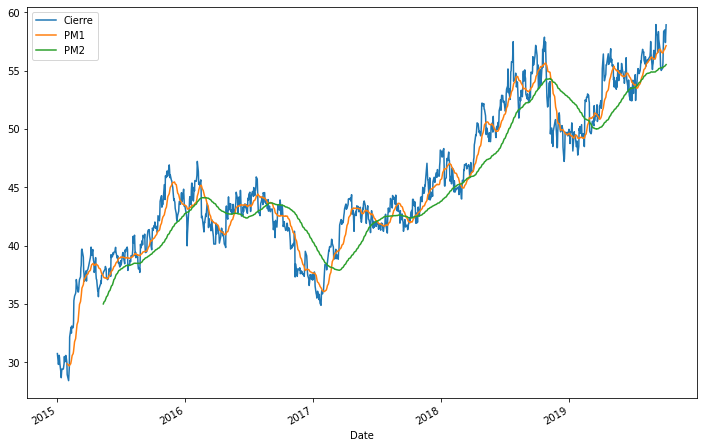

In [13]:
df[['Cierre', 'PM1', 'PM2']].plot(figsize=(12,8));

### Generar señales de compra/venta

* 1 Posición LONG:  PM1 > PM2
* -1 Posición SHORT:  PM1 < PM2

In [14]:
df['Posicion'] = np.where(df['PM1'] > df['PM2'], 1, -1)

### Graficar posiciones en el mercado

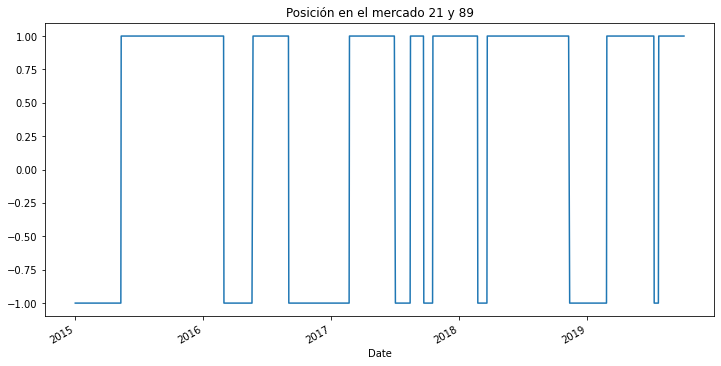

In [20]:
df['Posicion'].plot(figsize=(12,6), title=f'Posición en el mercado {pm1} y {pm2}');

In [21]:
import matplotlib.pyplot as plt

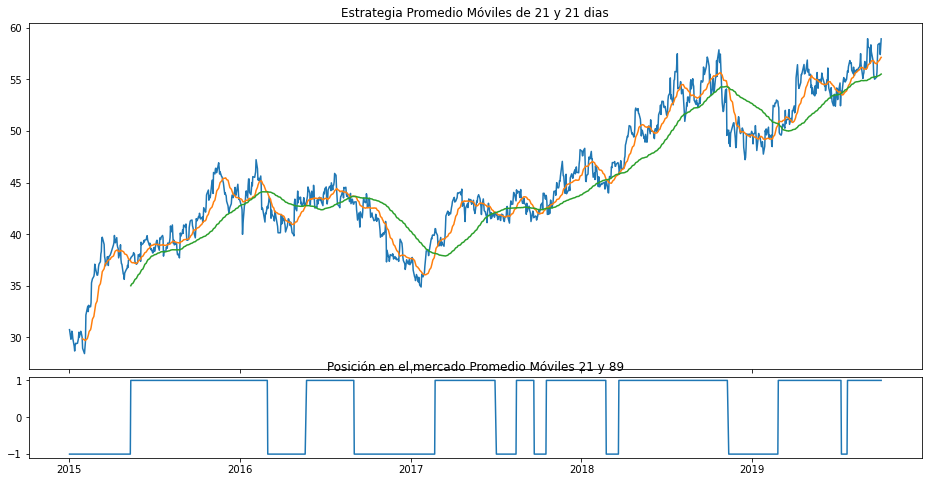

In [22]:
fig = plt.figure(figsize=(16,8))

ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 8, title=f'Estrategia Promedio Móviles de {pm1} y {pm1} dias')
plt.plot(df[['Cierre', 'PM1', 'PM2']])

ax2 = plt.subplot2grid((10,1), (8,0), rowspan = 2, title=f'Posición en el mercado Promedio Móviles {pm1} y {pm2}')
plt.plot(df['Posicion'])

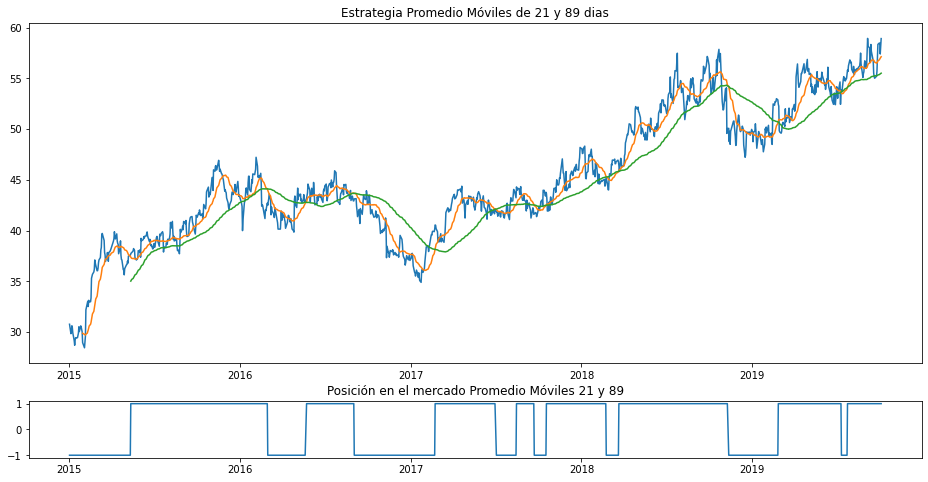

In [26]:
fig = plt.figure(figsize=(16,8))

ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 8, title=f'Estrategia Promedio Móviles de {pm1} y {pm2} dias')
plt.plot(df[['Cierre', 'PM1', 'PM2']])

ax2 = plt.subplot2grid((10,1), (8,0), rowspan = 2, title=f'Posición en el mercado Promedio Móviles {pm1} y {pm2}')
plt.plot(df['Posicion'])

fig.subplots_adjust(hspace=4)

### Realizar back testing de la estrategia

#### Calcular retornos del mercado

#### Calcular retornos de la estrategia

#### Graficar retornos del mercado Vs retornos de la estrategia